# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Arini Arumsari
- Email: ariniarum98@gmail.com
- Id Dicoding: -

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv("data.csv", sep=";")
df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2541,1,1,1,9853,1,1,148.0,1,19,19,...,0,6,6,0,0.0000,0,13.9,-0.3,0.79,Dropout
3569,1,39,1,9085,1,19,133.1,1,3,1,...,0,6,0,0,0.0000,0,10.8,1.4,1.74,Dropout
2570,1,1,4,9500,1,1,137.0,1,19,37,...,0,8,9,8,14.4025,1,9.4,-0.8,-3.12,Graduate
3286,1,7,1,9556,1,43,160.0,1,38,19,...,0,7,13,0,0.0000,1,11.1,0.6,2.02,Dropout
444,1,17,1,9670,1,1,123.0,1,19,19,...,0,5,5,4,11.0000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [3]:
df.shape

(4424, 37)

In [4]:
# Mengecek apakah ada data yang NaN/Null
print(df.isnull().values.any())
print(df.isna().sum())

False
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                           

tidak ada data yang Null

In [5]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
df.describe(include='object')

,Status
count,4424
unique,3
top,Graduate
freq,2209


In [7]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
df.duplicated().sum()


0

tidak terdapat data duplikated

## Data Preparation / Preprocessing

In [9]:
df['Status'].value_counts()


Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [10]:
df = df[df.Status!='Enrolled']


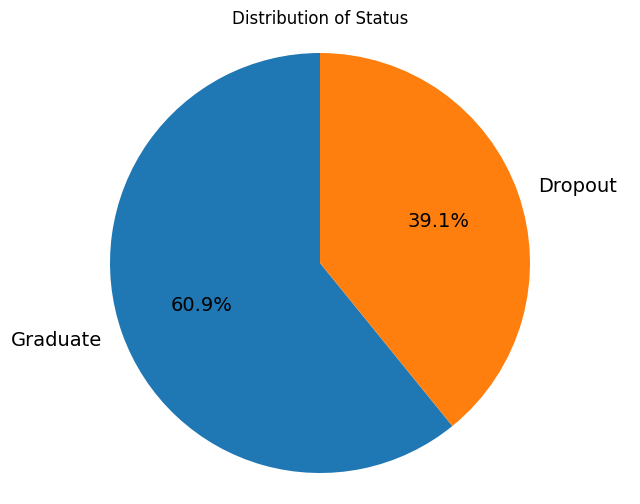

In [11]:

status_counts = df['Status'].value_counts()
labels = status_counts.index
sizes = status_counts.values

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Distribution of Status')
plt.axis('equal')
plt.show()

In [12]:
# Mengubah kolom 'Status' menjadi numerik
df['Status']=df['Status'].map({'Dropout':0,'Graduate':1})

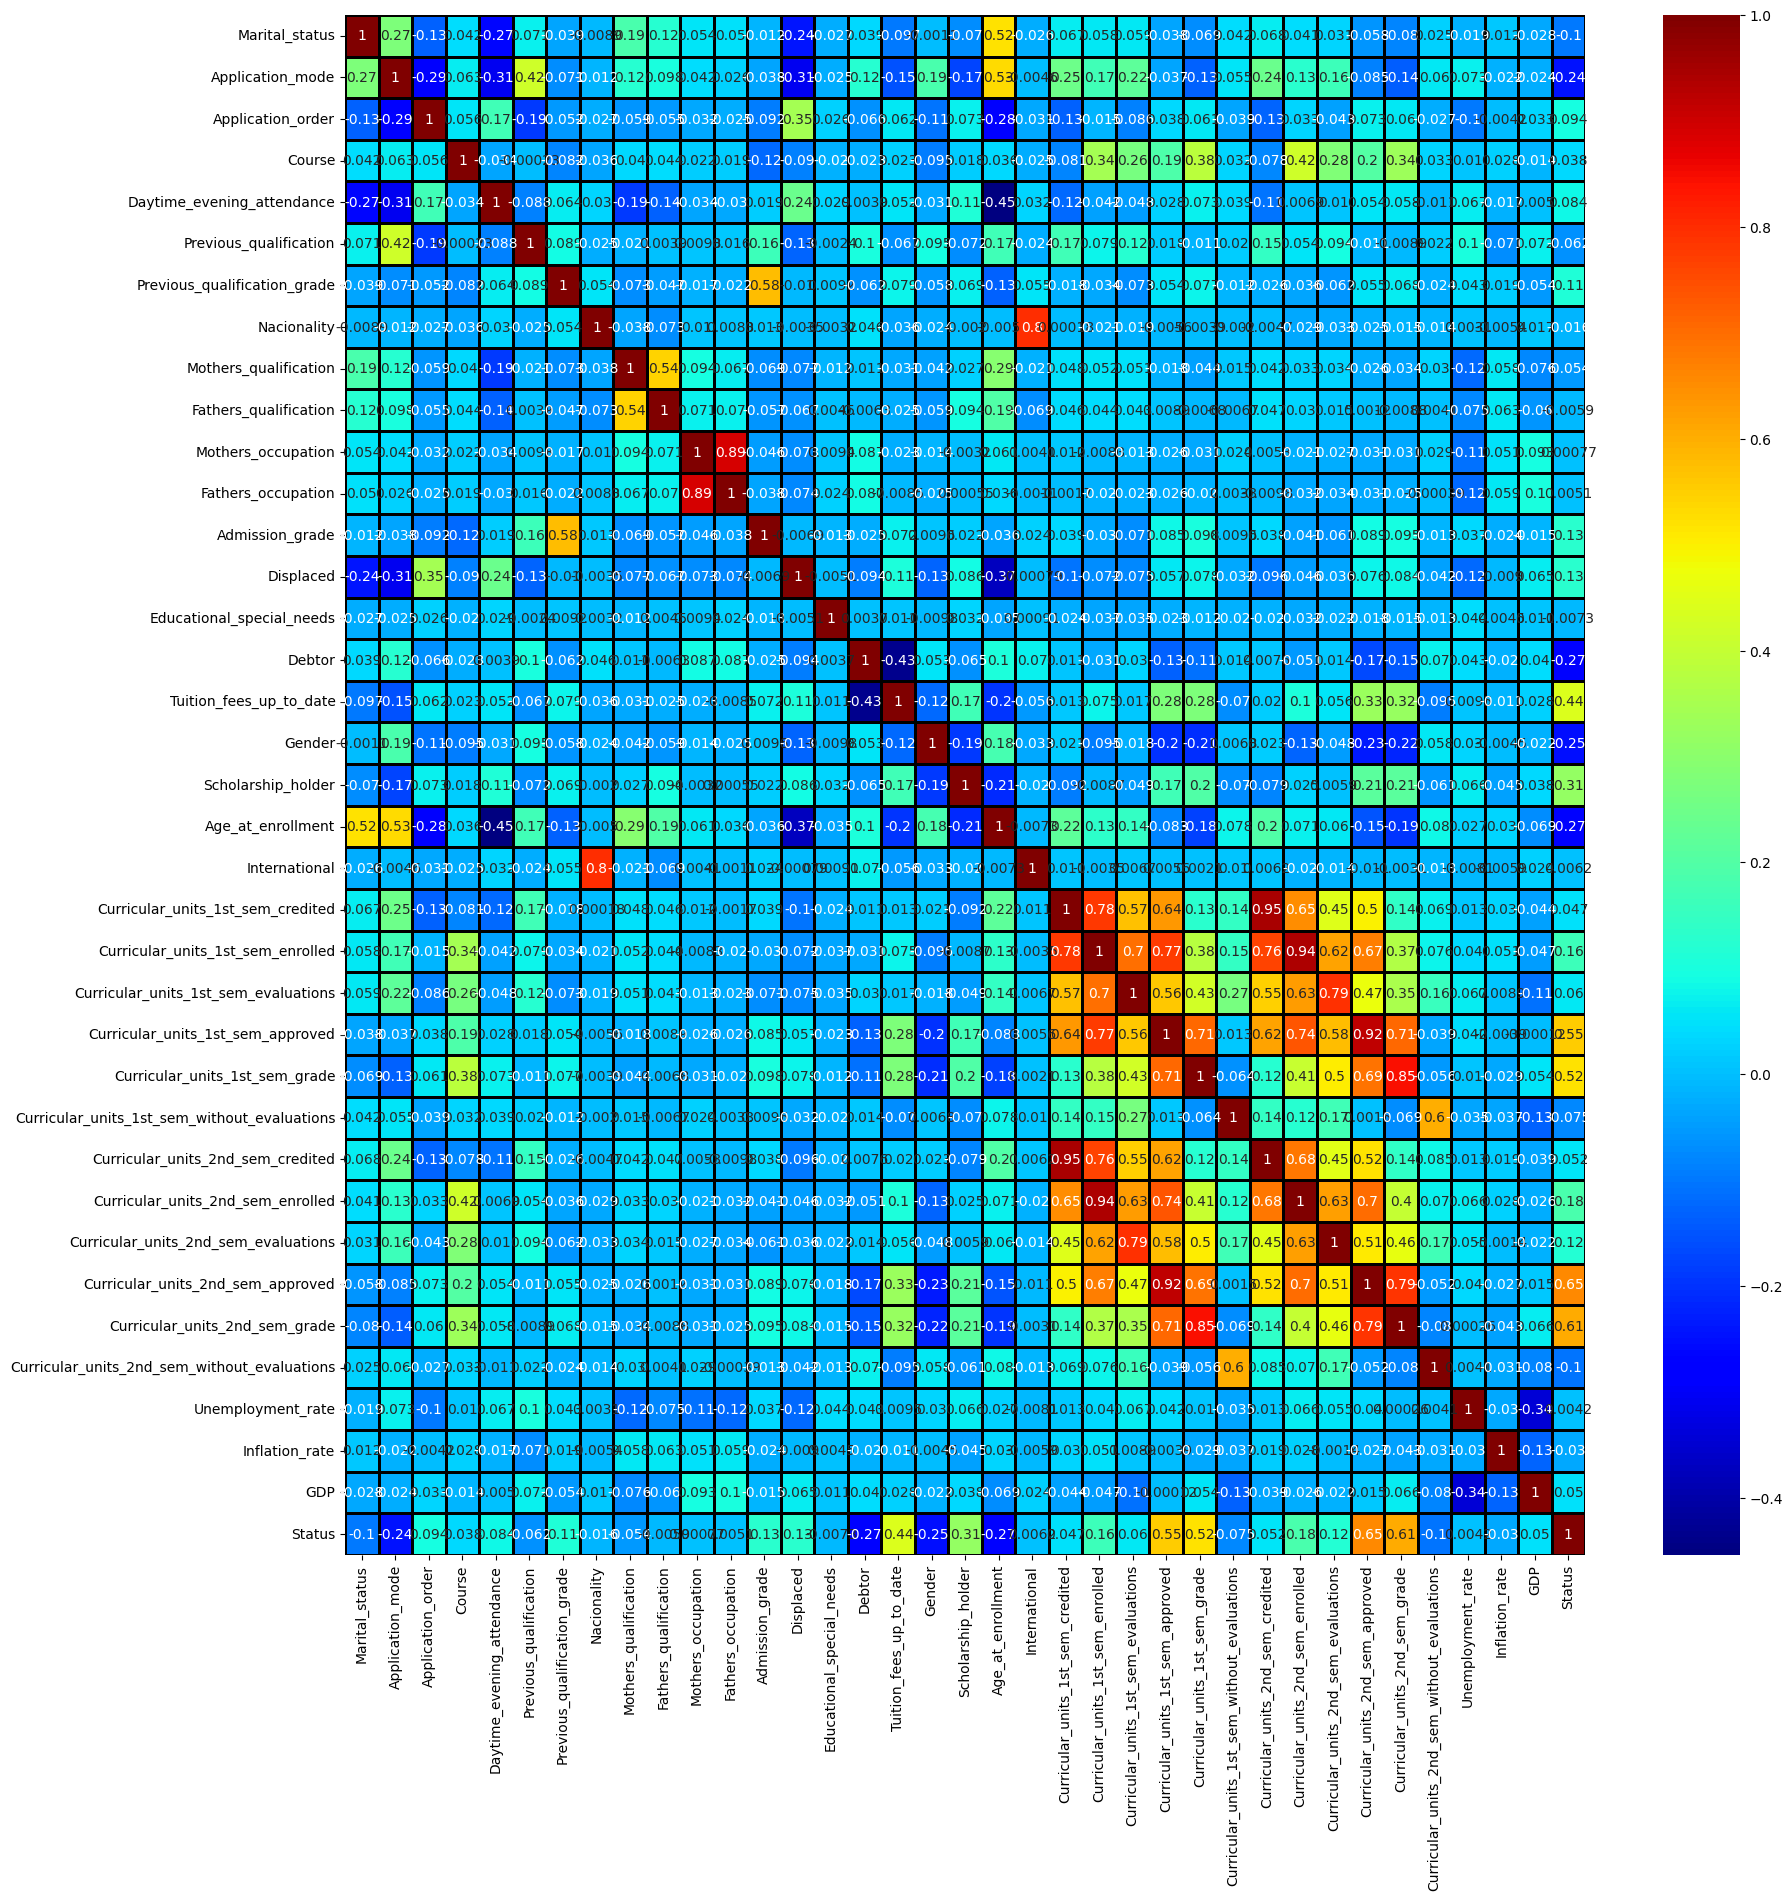

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

In [14]:
df.corr()['Status']


Marital_status                                 -0.100479
Application_mode                               -0.244507
Application_order                               0.094355
Course                                          0.038135
Daytime_evening_attendance                      0.084496
Previous_qualification                         -0.062323
Previous_qualification_grade                    0.109464
Nacionality                                    -0.015516
Mothers_qualification                          -0.053989
Fathers_qualification                          -0.005865
Mothers_occupation                              0.000772
Fathers_occupation                              0.005066
Admission_grade                                 0.128058
Displaced                                       0.126113
Educational_special_needs                      -0.007254
Debtor                                         -0.267207
Tuition_fees_up_to_date                         0.442138
Gender                         

Mengeliminasi variabel yang mempunyai korelasi kecil terhadap "Status" dan tidak akan dipakai untuk melatih model



In [15]:
df.drop(columns=['Marital_status',
                          'Age_at_enrollment',
                          'Application_mode',
                          'Application_order',
                          'Course',
                          'Previous_qualification',
                          'Nacionality',
                          'Mothers_qualification',
                          'Fathers_qualification',
                          'Mothers_occupation',
                          'Fathers_occupation',
                          'Educational_special_needs',
                          'International',
                          'Curricular_units_1st_sem_evaluations',
                          'Curricular_units_1st_sem_without_evaluations',
                          'Curricular_units_2nd_sem_evaluations',
                          'Curricular_units_2nd_sem_without_evaluations',
                          'Unemployment_rate',
                          'Inflation_rate',
                         'GDP'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Daytime_evening_attendance         3630 non-null   int64  
 1   Previous_qualification_grade       3630 non-null   float64
 2   Admission_grade                    3630 non-null   float64
 3   Displaced                          3630 non-null   int64  
 4   Debtor                             3630 non-null   int64  
 5   Tuition_fees_up_to_date            3630 non-null   int64  
 6   Gender                             3630 non-null   int64  
 7   Scholarship_holder                 3630 non-null   int64  
 8   Curricular_units_1st_sem_credited  3630 non-null   int64  
 9   Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 10  Curricular_units_1st_sem_approved  3630 non-null   int64  
 11  Curricular_units_1st_sem_grade     3630 non-null   float64
 1

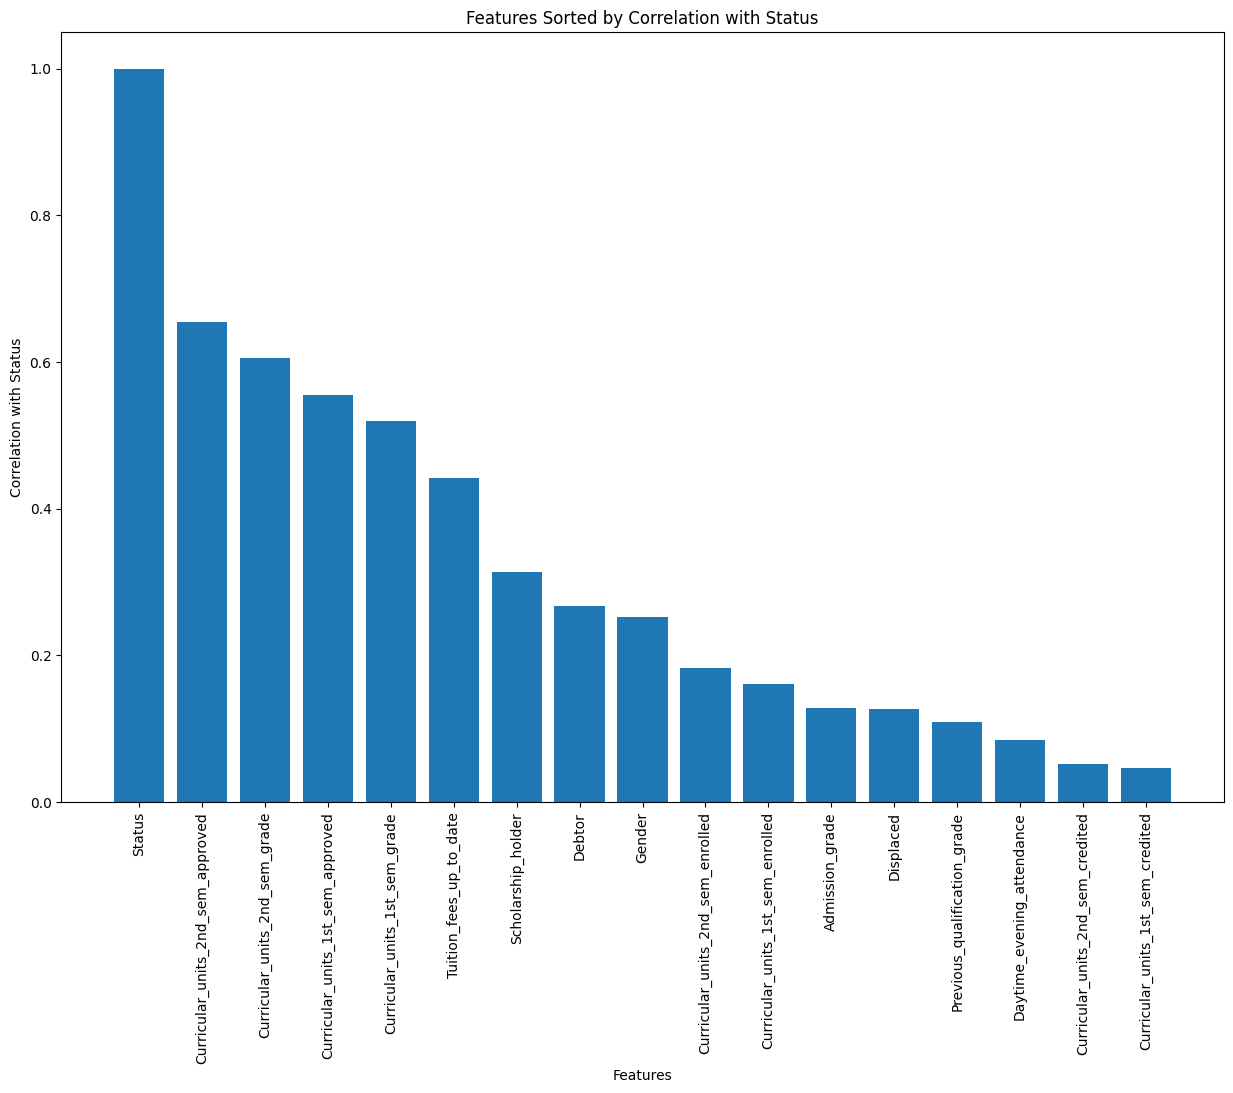

In [16]:
correl = df.corr()['Status']
sorted_corr = correl.abs().sort_values(ascending=False)

plt.figure(figsize=(15, 10))
plt.bar(sorted_corr.index, sorted_corr.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Status')
plt.title('Features Sorted by Correlation with Status')
plt.xticks(rotation=90)
plt.show()

In [17]:
correl.head()

Daytime_evening_attendance      0.084496
Previous_qualification_grade    0.109464
Admission_grade                 0.128058
Displaced                       0.126113
Debtor                         -0.267207
Name: Status, dtype: float64

Mengubah nilai beberapa variabel dari numerik menjadi string



In [18]:
df['Gender'] = df['Gender'].astype(str).replace({'0': 'Male', '1': 'Female'})
df['Displaced'] = df['Displaced'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Debtor'] = df['Debtor'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Scholarship_holder'] = df['Scholarship_holder'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype(str).replace({'0': 'No', '1': 'Yes'})
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype(str).replace({'0': 'Evening', '1': 'Daytime'})
df['Status'] = df['Status'].astype(str).replace({'0': 'Dropout', '1': 'Graduate'})

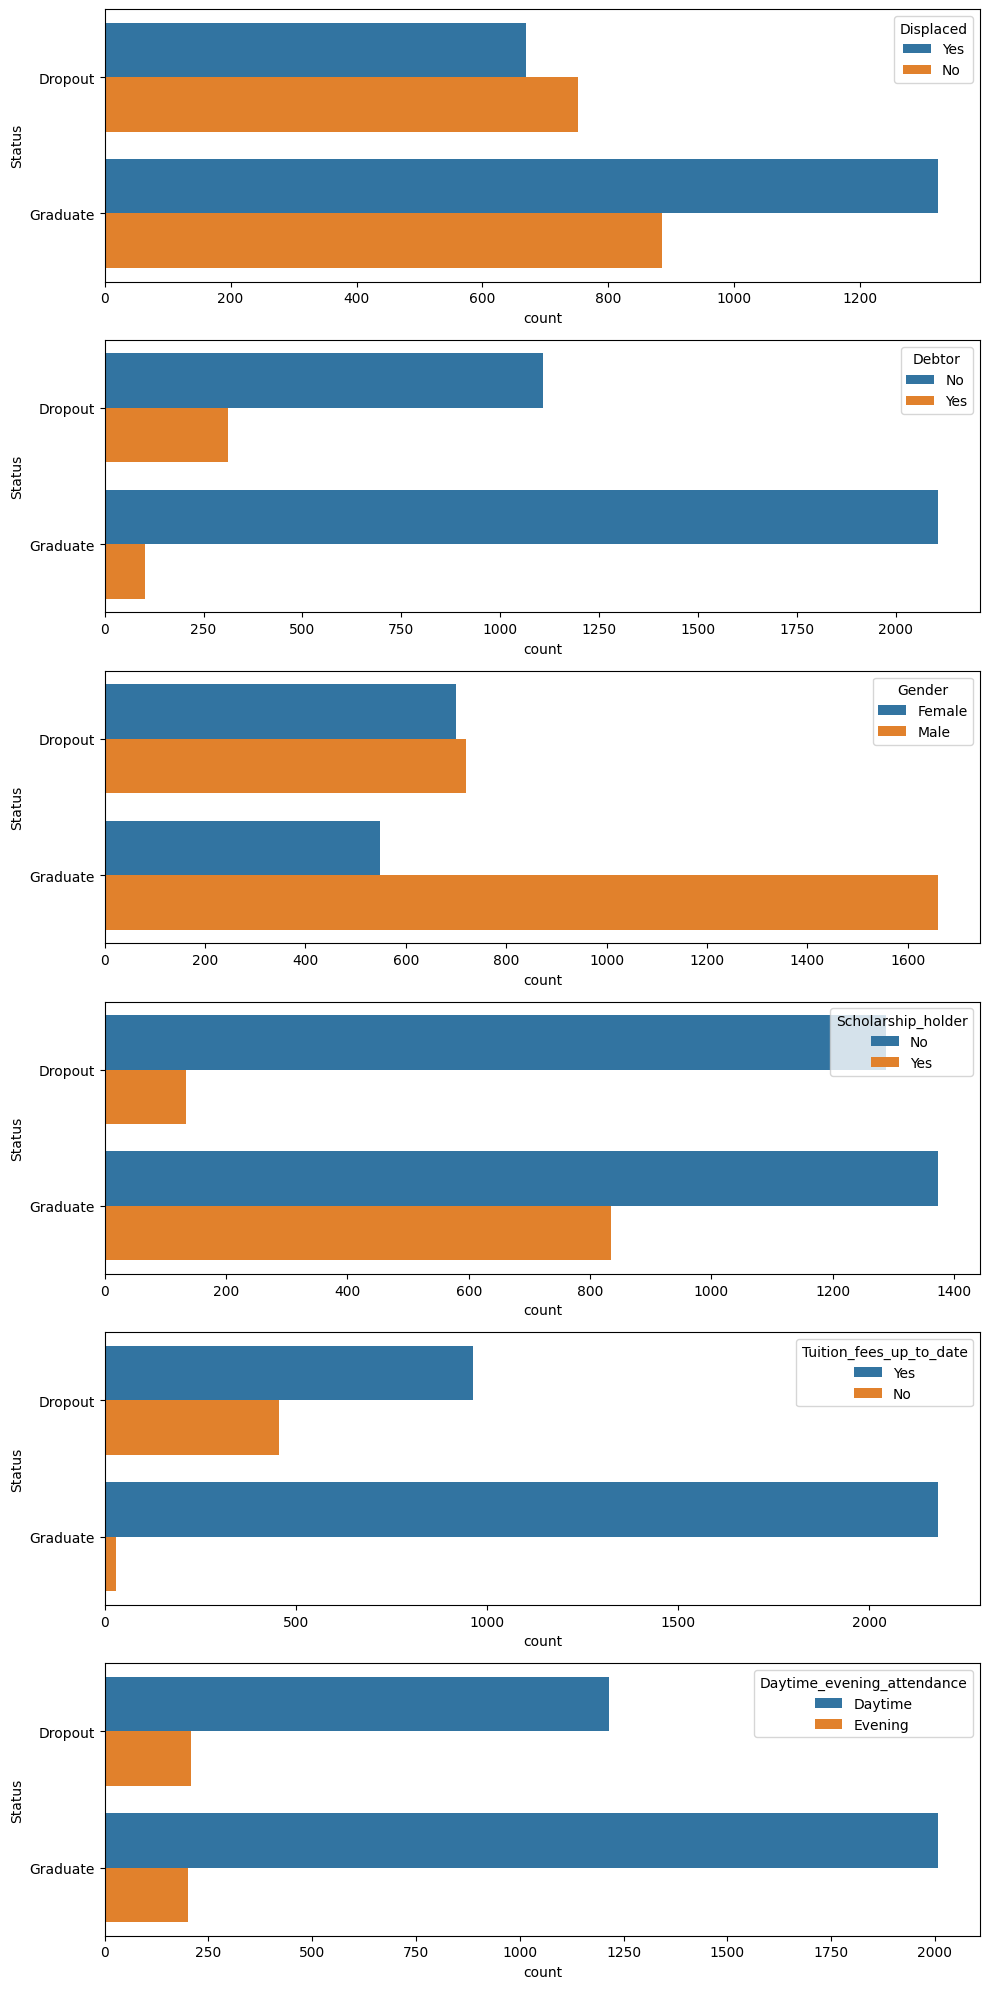

In [19]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(

features=[
        'Displaced',
        'Debtor',
        'Gender',
        'Scholarship_holder',
        'Tuition_fees_up_to_date',
        'Daytime_evening_attendance'
    ],
    df=df,
    segment_feature="Status"
)


## Modeling

In [20]:

category_cols = df.select_dtypes(exclude=['int32','int64','float32','float64'])
category_cols.head()

,Daytime_evening_attendance,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Status
0,Daytime,Yes,No,Yes,Female,No,Dropout
1,Daytime,Yes,No,No,Female,No,Graduate
2,Daytime,Yes,No,No,Female,No,Dropout
3,Daytime,Yes,No,Yes,Male,No,Graduate
4,Evening,No,No,Yes,Male,No,Graduate


In [21]:
df.describe()

,Previous_qualification_grade,Admission_grade,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,132.920606,127.293939,0.754270,6.337466,4.791460,10.534860,0.581818,6.296419,4.518457,10.036155
std,13.238373,14.611295,2.477277,2.570773,3.237845,5.057694,2.022688,2.263020,3.162376,5.481742
min,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,118.000000,0.000000,5.000000,3.000000,11.000000,0.000000,5.000000,2.000000,10.517857
50%,133.100000,126.500000,0.000000,6.000000,5.000000,12.341429,0.000000,6.000000,5.000000,12.333333
75%,140.000000,135.100000,0.000000,7.000000,6.000000,13.500000,0.000000,7.000000,6.000000,13.500000
max,190.000000,190.000000,20.000000,26.000000,26.000000,18.875000,19.000000,23.000000,20.000000,18.571429


In [22]:
import os
os.makedirs("model")


In [23]:
import joblib

def save_encoders(features, encoder):
    for feature in features:
        joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

features_to_encode = ['Daytime_evening_attendance',
                     'Displaced',
                     'Debtor',
                     'Tuition_fees_up_to_date',
                     'Gender',
                     'Scholarship_holder']

label_encoder = LabelEncoder()

# Label encode columns and save encoders
for column in features_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

save_encoders(features_to_encode, label_encoder)

In [24]:
def save_scalers(features, scaler):
    for feature in features:
        joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

features_to_scale = ['Admission_grade',
                     'Previous_qualification_grade',
                     'Curricular_units_1st_sem_approved',
                     'Curricular_units_1st_sem_grade',
                     'Curricular_units_1st_sem_enrolled',
                     'Curricular_units_1st_sem_credited',
                     'Curricular_units_2nd_sem_approved',
                     'Curricular_units_2nd_sem_grade',
                     'Curricular_units_2nd_sem_enrolled',
                     'Curricular_units_2nd_sem_credited']

scaler = StandardScaler()

# Fit scaler to columns and save scalers
for column in features_to_scale:
    scaled_feature = scaler.fit_transform(df[[column]])
    scaled_feature = scaled_feature.reshape(-1, 1)  # Reshape the scaled feature
    df[column] = scaled_feature
    save_scalers([column], scaler)

In [25]:
X=np.array(df.drop(['Status'],axis=1))
y=np.array(df['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(2904, 16)
(726, 16)


In [26]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

y_test = encoder.transform(y_test)

## Model Decision Tree


In [27]:

# Initialize the Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'min_samples_leaf': [1, 10, 100],
    'max_depth': [1, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_dt,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_dt_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_dt_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_dt_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Decision Tree Classifier is", test_accuracy)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}
The test accuracy score of Decision Tree Classifier is 0.8815426997245179


## Model Logistic Regression


In [28]:
# Initialize the Logistic Regression classifier
clf_lr = LogisticRegression()

# Define the grid of hyperparameters
param_grid1 = {
    'C' :[0.1, 1, 10, 100],
    'max_iter': [100, 150, 250, 400],
    'multi_class': ['auto'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
    'tol': [1e-4, 1e-5, 1e-6]
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_lr,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_lr_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_lr_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_lr_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Logistic Regression is", test_accuracy)

Best parameters: {'C': 1, 'max_iter': 100, 'multi_class': 'auto', 'solver': 'saga', 'tol': 0.0001}
The test accuracy score of Logistic Regression is 0.9090909090909091


## Model Random Forest


In [29]:
# Initialize the Random Forest classifier
clf_rf = RandomForestClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_rf,
    param_grid=param_grid1,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_rf_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_rf_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_rf_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Random Forest Classifier is", test_accuracy)


Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}
The test accuracy score of Random Forest Classifier is 0.8939393939393939


## Model Gradient Boosting


In [30]:
# Initialize the Gradient Boosting classifier
clf_gb = GradientBoostingClassifier()

# Define the grid of hyperparameters
param_grid1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Initialize GridSearchCV
gs1 = GridSearchCV(
    estimator=clf_gb,
    param_grid=param_grid1,
    cv=5,
    scoring='accuracy'
)

# Train the classifier using GridSearchCV
clf_gb_grid = gs1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_gb_grid.predict(X_test)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf_gb_grid.best_params_)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy score of Gradient Boosting Classifier is", test_accuracy)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
The test accuracy score of Gradient Boosting Classifier is 0.8911845730027548


# Evaluation

## Logistic Regression


In [31]:
lr_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Logistric Regression:")
print(lr_cm)

Confusion Matrix of Logistric Regression:
[[229  48]
 [ 31 418]]


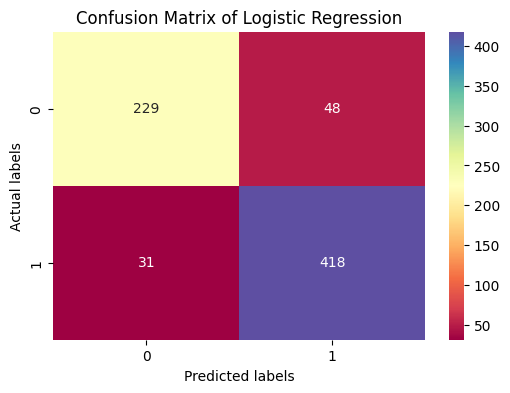

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [33]:

print("The Classification Report of Logistic Regression")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



## Decision Tree


In [34]:


dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Decision Tree Classifier:")
print(dt_cm)

Confusion Matrix of Decision Tree Classifier:
[[229  48]
 [ 31 418]]


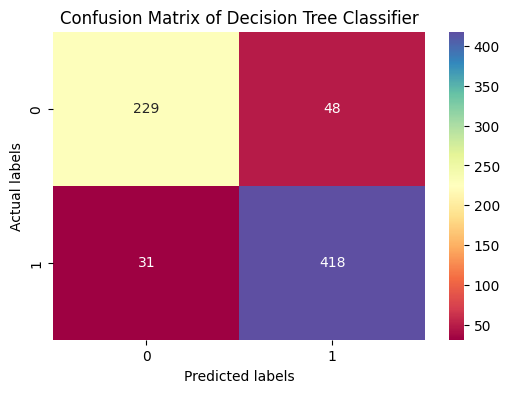

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

In [36]:


print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred, zero_division=1))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



## Random Forest


In [37]:
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)

Confusion Matrix of Random Forest Classifier:
[[229  48]
 [ 31 418]]


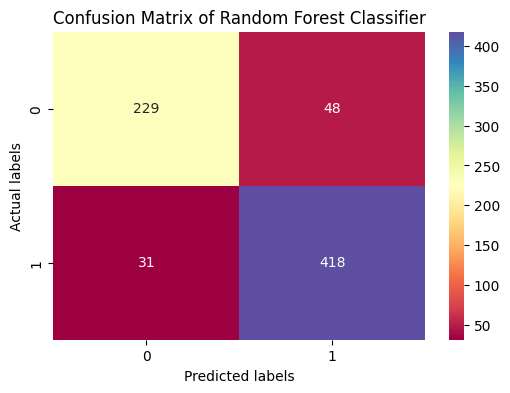

In [38]:

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [39]:

print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



## Gradient Boosting


In [40]:

gb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of Gradient Boosting Classifier:")
print(gb_cm)

Confusion Matrix of Gradient Boosting Classifier:
[[229  48]
 [ 31 418]]


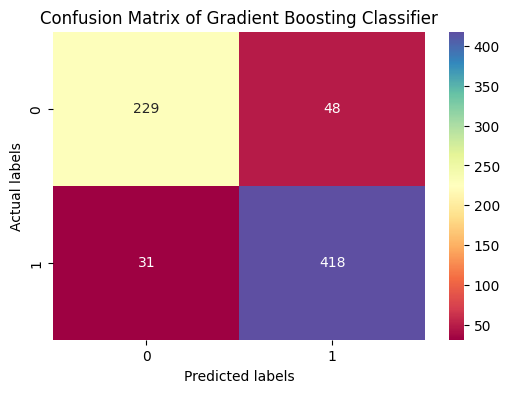

In [41]:

plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, cmap='Spectral', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix of Gradient Boosting Classifier')
plt.show()

In [42]:

print("The Classification Report of Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       277
           1       0.90      0.93      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



# Deployment


In [43]:
joblib.dump(clf_rf_grid, 'Random_Forest_Model.joblib')


['Random_Forest_Model.joblib']

In [44]:
df.to_csv('df_clean.csv', index=False)  # Optional: exclude the index column
